In [1]:
import os
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import slideio
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import shapely 
from matplotlib.patches import Polygon as MPolygon
from matplotlib.collections import PatchCollection

In [34]:
erosion_val = 0.045

In [3]:
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)


In [4]:
np_im = np.load("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/spatial_omics/DH/held_out_wsi/45_A4_2.npy")

In [5]:
min_dim_size = 1028
min_dim = min(np_im.shape[1], np_im.shape[0])
max_dim = max(np_im.shape[1], np_im.shape[0])
scale_ratio = min_dim_size/min_dim
res = cv2.resize(np_im, dsize=(int(scale_ratio*np_im.shape[1]), int(scale_ratio*np_im.shape[0])), interpolation=cv2.INTER_CUBIC)

In [6]:
res.shape

(1028, 1310, 3)

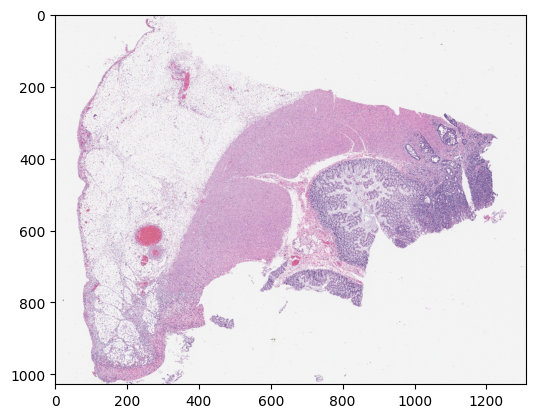

In [7]:
plt.imshow(res)

In [8]:
predictor.set_image(res)

input_box = np.array([int(0+erosion_val*res.shape[1]), int(0+erosion_val*res.shape[0]), int(res.shape[1]-erosion_val*res.shape[1]), int(res.shape[0] - erosion_val*res.shape[0])])
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)


In [9]:
masks = masks.squeeze()
masks.shape

(1028, 1310)

In [10]:
binary_mask = (masks * 255).astype(np.uint8)
contour, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [11]:
len(contour)

2

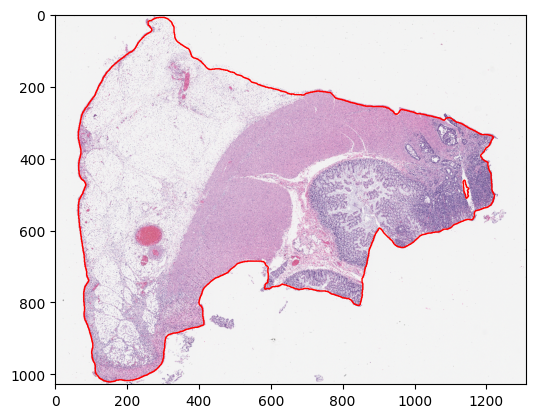

In [12]:
 # Create a figure and a single subplot
fig, ax = plt.subplots(1)
# Display the binary mask
ax.imshow(res)

# For each contour, create a polygon and add it to the plot
for contour in contour:
    # Contour is an array of shape (N, 1, 2). We reshape it to (N, 2)
    reshaped_contour = contour.reshape(-1, 2)
    # Create a Polygon object
    polygon = MPolygon(reshaped_contour, fill=None, edgecolor='r')
    # Add the polygon to the plot
    ax.add_patch(polygon)

plt.show()


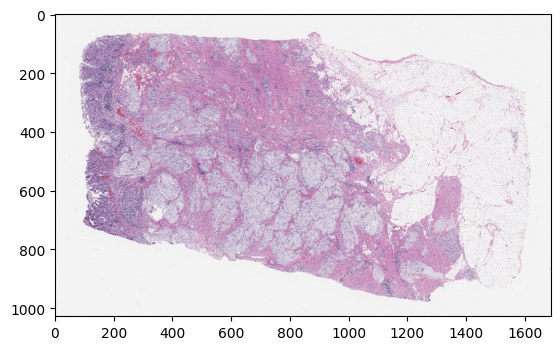

In [13]:
np_im = np.load("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/spatial_omics/DH/held_out_wsi/24_B12_3_orig.npy")

min_dim_size = 1028
min_dim = min(np_im.shape[1], np_im.shape[0])
max_dim = max(np_im.shape[1], np_im.shape[0])
scale_ratio = min_dim_size/min_dim
res = cv2.resize(np_im, dsize=(int(scale_ratio*np_im.shape[1]), int(scale_ratio*np_im.shape[0])), interpolation=cv2.INTER_CUBIC)

plt.imshow(res)

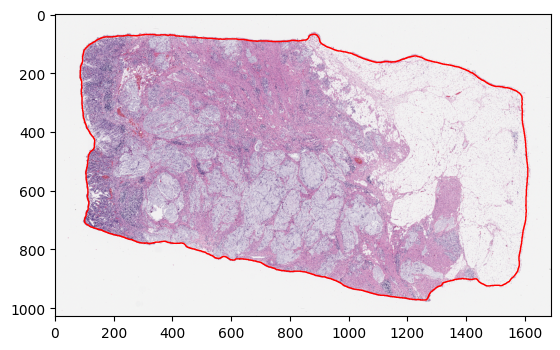

In [14]:
predictor = SamPredictor(sam)
predictor.set_image(res)

input_box = np.array([int(0+erosion_val*res.shape[1]), int(0+erosion_val*res.shape[0]), int(res.shape[1]-erosion_val*res.shape[1]), int(res.shape[0] - erosion_val*res.shape[0])])
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)
masks = masks.squeeze()

binary_mask = (masks * 255).astype(np.uint8)
contour, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a figure and a single subplot
fig, ax = plt.subplots(1)
# Display the binary mask
ax.imshow(res)

# For each contour, create a polygon and add it to the plot
for contour in contour:
    # Contour is an array of shape (N, 1, 2). We reshape it to (N, 2)
    reshaped_contour = contour.reshape(-1, 2)
    # Create a Polygon object
    polygon = MPolygon(reshaped_contour, fill=None, edgecolor='r')
    # Add the polygon to the plot
    ax.add_patch(polygon)

plt.show()


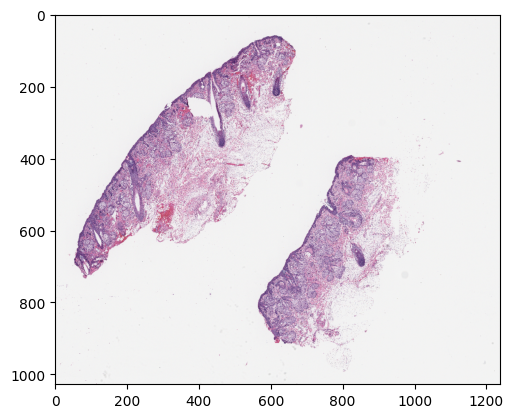

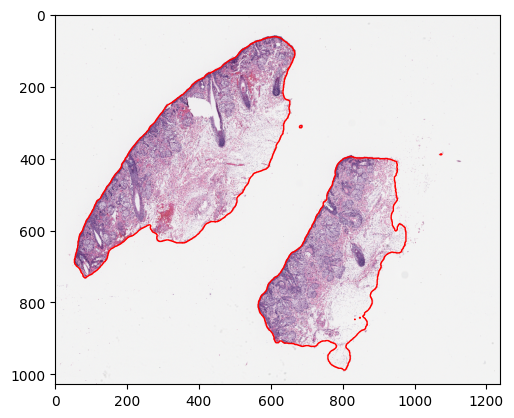

In [154]:
# np_im = np.load("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/spatial_omics/DH/held_out_wsi/6_A8_3_orig.npy")

min_dim_size = 1028
min_dim = min(np_im.shape[1], np_im.shape[0])
max_dim = max(np_im.shape[1], np_im.shape[0])
scale_ratio = min_dim_size/min_dim
res = cv2.resize(np_im, dsize=(int(scale_ratio*np_im.shape[1]), int(scale_ratio*np_im.shape[0])), interpolation=cv2.INTER_CUBIC)

plt.imshow(res)

predictor = SamPredictor(sam)
predictor.set_image(res)

input_box = np.array([int(0+erosion_val*res.shape[1]), int(0+erosion_val*res.shape[0]), int(res.shape[1]-erosion_val*res.shape[1]), int(res.shape[0] - erosion_val*res.shape[0])])
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)
masks = masks.squeeze()

binary_mask = (masks * 255).astype(np.uint8)
contours, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a figure and a single subplot
fig, ax = plt.subplots(1)
# Display the binary mask
ax.imshow(res)

# For each contour, create a polygon and add it to the plot
for contour in contours:
    # Contour is an array of shape (N, 1, 2). We reshape it to (N, 2)
    reshaped_contour = contour.reshape(-1, 2)
    # Create a Polygon object
    polygon = MPolygon(reshaped_contour, fill=None, edgecolor='r')
    # Add the polygon to the plot
    ax.add_patch(polygon)

plt.show()


In [85]:
for c in contours: 
    print(Polygon(c.squeeze()).area)

58150.0
428783.5
699.0
52.0


In [86]:
from shapely import Polygon, MultiPolygon
from shapely.affinity import translate 
from shapely.affinity import scale 


#now extract the polygon and scale up 
minimum_thresh = 1e4
polygons = []
for i in contours: 
    if Polygon(i.squeeze()).area > minimum_thresh: 
        polygons.append(Polygon(i.squeeze()).buffer(0))

In [88]:
multi_polygon = MultiPolygon(polygons)

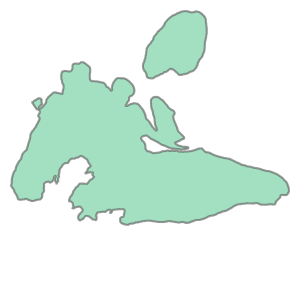

In [89]:
multi_polygon

In [70]:
# biggest_region = translate(biggest_region, yoff = int(0+erosion_val*res.shape[0]), xoff = int(0+erosion_val*res.shape[1]))
multi_polygon = scale(multi_polygon, yfact = int(1/scale_ratio), xfact = int(1/scale_ratio))

In [71]:
multi_polygon.area

735754696.0

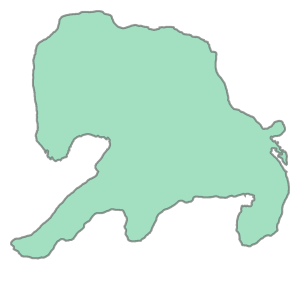

In [23]:
biggest_region

## COLON TEST CASES

In [72]:
import os
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import slideio
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import shapely
from shapely import Polygon, MultiPolygon
from shapely.affinity import translate 
from shapely.affinity import scale 
from matplotlib.patches import Polygon as MPolygon
from matplotlib.collections import PatchCollection

In [114]:
class TissueDetector():
    def __init__(self, device): #init all the model stuff 
        self.DEVICE = device
        self.CHECKPOINT_PATH = "/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/users/Gokul_Srinivasan/Tissue_Detection/sam_vit_h_4b8939.pth"
        self.MODEL_TYPE = "vit_h"
        
        self.sam = sam_model_registry[self.MODEL_TYPE](checkpoint=self.CHECKPOINT_PATH).to(device=self.DEVICE)
        
        # self.mask_generator = SamAutomaticMaskGenerator(
        #     model=self.sam,
        #     points_per_side=32,
        #     points_per_batch=64, 
        #     pred_iou_thresh=0.86,
        #     stability_score_thresh=0.92,
        #     min_mask_region_area=int(1e5), 
        # )
        self.reduced_img = None
        self.scale_ratio = None
        self.contours = []
        self.small_contours = []
        
    def find_tissue_contours(self, np_im, erosion_val=0.05):
        #reset after every call
        self.contours = []
        self.small_contours = []
        
        min_dim_size = 1028
        min_dim = min(np_im.shape[1], np_im.shape[0])
        max_dim = max(np_im.shape[1], np_im.shape[0])
        self.scale_ratio = min_dim_size/min_dim
        res = cv2.resize(np_im, dsize=(int(self.scale_ratio*np_im.shape[1]), int(self.scale_ratio*np_im.shape[0])), interpolation=cv2.INTER_CUBIC)
        self.reduced_img = res 
        
        input_box = np.array([int(0+erosion_val*res.shape[1]), int(0+erosion_val*res.shape[0]), int(res.shape[1]-erosion_val*res.shape[1]), int(res.shape[0] - erosion_val*res.shape[0])])
        
        predictor = SamPredictor(self.sam)
        predictor.set_image(res)

        masks, _, _ = predictor.predict(
            point_coords=None,
            point_labels=None,
            box=input_box[None, :],
            multimask_output=False,
        )
        masks = masks.squeeze()

        binary_mask = (masks * 255).astype(np.uint8)
        small_contours, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        #now extract the polygon and scale up 
        minimum_thresh = 1e4
        polygons = []
        for i in small_contours: 
            contour_coords = i.squeeze()
            if contour_coords.ndim == 1: 
                continue  
            poly = Polygon(contour_coords)
            if poly.buffer(0).area > minimum_thresh: 
                polygons.append(poly.buffer(0))
                
        multi_polygon = MultiPolygon(polygons)
        multi_polygon = scale(multi_polygon, yfact = int(1/scale_ratio), xfact = int(1/scale_ratio))
        self.contours = multi_polygon
        self.small_contours = small_contours
        #find the biggest region and scale it up 
#         sam_result = self.mask_generator.generate(res)
        
#         big_regions = []
#         for r in sam_result:
#             if r["area"] > 5e4: 
#                 big_regions.append(r)
                
#         big_regions = sorted(big_regions, key=lambda x: x["area"], reverse=False)
#         big_regions = big_regions[:-1] #include everything but the big background segmentation
        
#         for region in big_regions:
#             binary_mask = (region["segmentation"] * 255).astype(np.uint8)
#             contour, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#             self.contours.append(contour[0]*(int(1/self.scale_ratio)))
#             self.scaled_contours.append(contour[0])
                         
    def get_contours(self):
        return self.contours 
    
    def plot_annotations(self):
        # Create a figure and a single subplot
        fig, ax = plt.subplots(1)
        # Display the binary mask
        ax.imshow(self.reduced_img)

        # For each contour, create a polygon and add it to the plot
        for contour in self.small_contours:
            # Contour is an array of shape (N, 1, 2). We reshape it to (N, 2)
            reshaped_contour = contour.reshape(-1, 2)
            # Create a Polygon object
            polygon = MPolygon(reshaped_contour, fill=None, edgecolor='r')
            # Add the polygon to the plot
            ax.add_patch(polygon)

        plt.show()

        

In [108]:
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

detector = TissueDetector(device) 

In [98]:
np_im = np.load("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/spatial_omics/DH/held_out_wsi/8_A1_0_orig.npy")

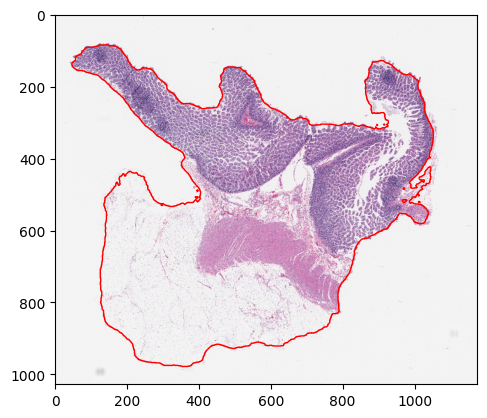

In [99]:
detector.find_tissue_contours(np_im)
detector.plot_annotations()

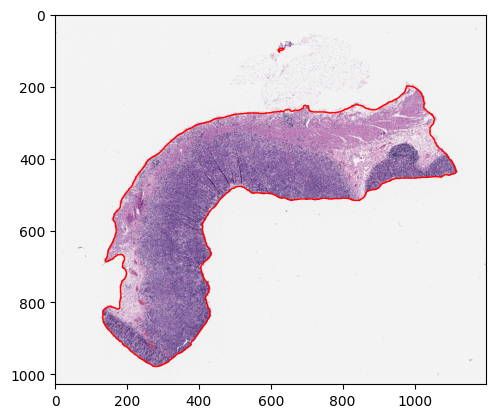

In [100]:
np_im = np.load("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/spatial_omics/DH/held_out_wsi/128_A8_2.npy")

detector.find_tissue_contours(np_im)
detector.plot_annotations()

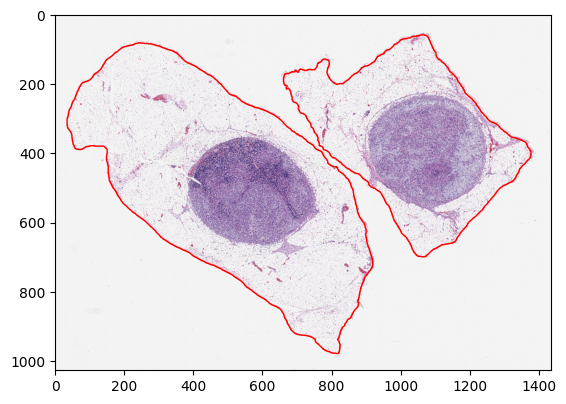

In [101]:
np_im = np.load("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/spatial_omics/DH/held_out_wsi/24_B16_11_orig.npy")

detector.find_tissue_contours(np_im)
detector.plot_annotations()

In [102]:
polygon = detector.get_contours()

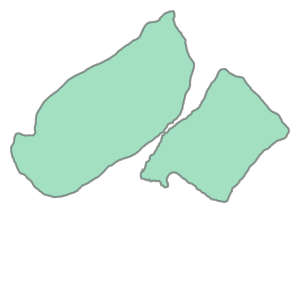

In [103]:
polygon

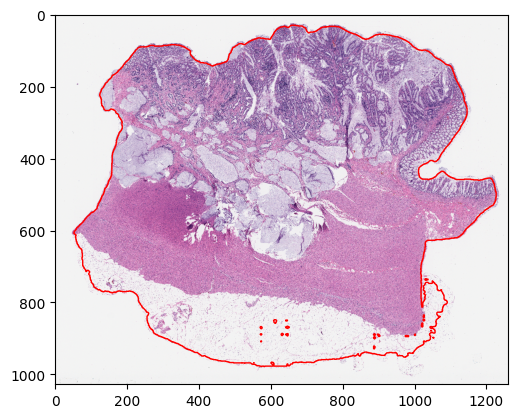

In [104]:
np_im = np.load("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/spatial_omics/DH/held_out_wsi/55_B4_2_orig.npy")

detector.find_tissue_contours(np_im)
detector.plot_annotations()

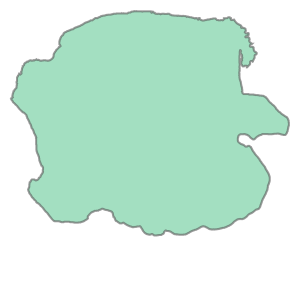

In [105]:
polygon = detector.get_contours()
polygon

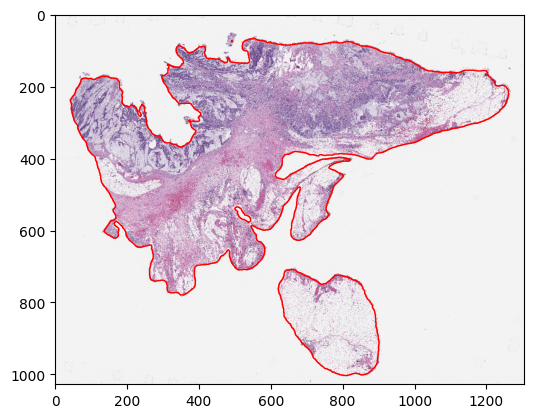

In [115]:
detector = TissueDetector(device) 
np_im = np.load("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/spatial_omics/DH/held_out_wsi/6_A8_3_orig.npy")

detector.find_tissue_contours(np_im)
detector.plot_annotations()

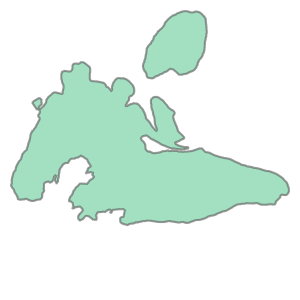

In [117]:
polygons = detector.get_contours()
polygons

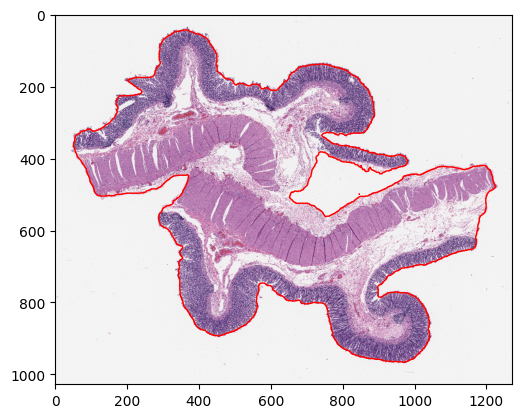

In [120]:
np_im = np.load("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/spatial_omics/DH/held_out_wsi/22_A8_0_orig.npy")

detector.find_tissue_contours(np_im)
detector.plot_annotations()

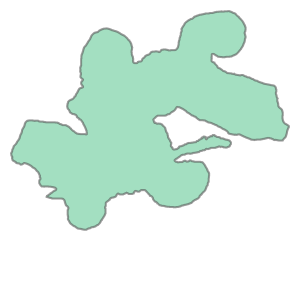

In [121]:
polygons = detector.get_contours()
polygons

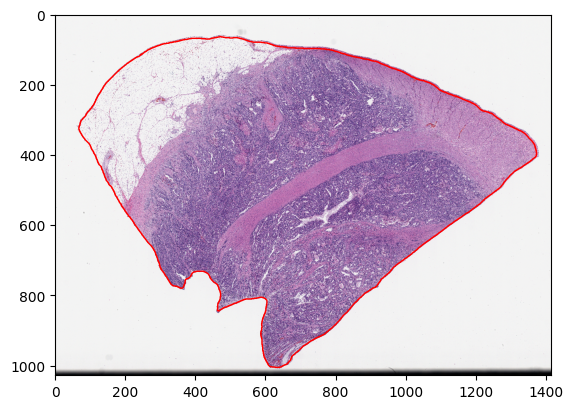

In [122]:
np_im = np.load("/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/spatial_omics/DH/held_out_wsi/139_A15_3.npy")

detector.find_tissue_contours(np_im)
detector.plot_annotations()

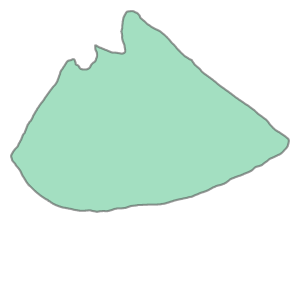

In [123]:
polygons = detector.get_contours()
polygons

## SKIN TEST CASES

In [135]:
import slideio 

impath = "/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/photoaging/WSI_combined/534979_.svs"
slide = slideio.open_slide(impath,'SVS')
num_scenes = slide.num_scenes
scene = slide.get_scene(0)
print(num_scenes, scene.name, scene.rect, scene.num_channels)
full_img = scene.read_block()
print(full_img.shape)

np_im =  np.asarray(full_img) 

print(np_im.shape)


1 Image (0, 0, 69720, 55048) 3
(55048, 69720, 3)
(55048, 69720, 3)


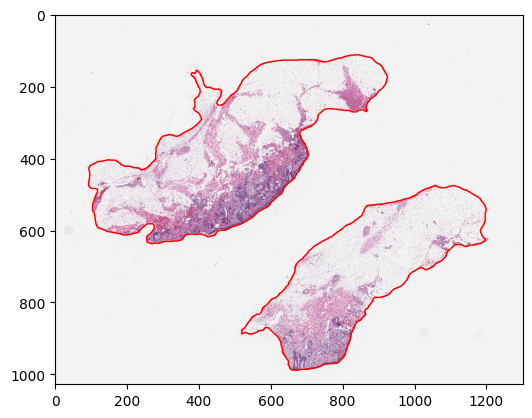

In [136]:
detector.find_tissue_contours(np_im)
detector.plot_annotations()

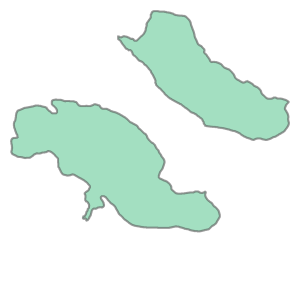

In [137]:
polygons = detector.get_contours()
polygons

(36721, 113544, 3)


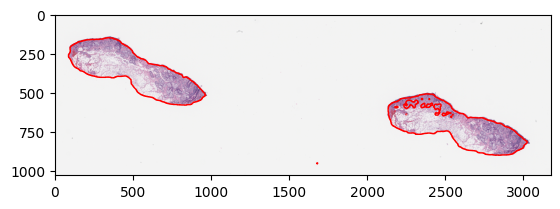

In [138]:
impath = "/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/photoaging/WSI_combined/535190_.svs"
slide = slideio.open_slide(impath,'SVS')
num_scenes = slide.num_scenes
scene = slide.get_scene(0)
full_img = scene.read_block()
np_im =  np.asarray(full_img) 
print(np_im.shape)
detector.find_tissue_contours(np_im)
detector.plot_annotations()

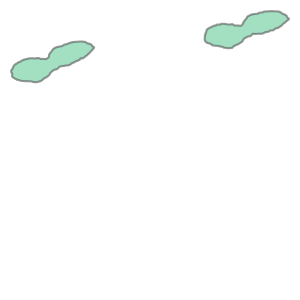

In [139]:
polygons = detector.get_contours()
polygons

(24501, 83664, 3)


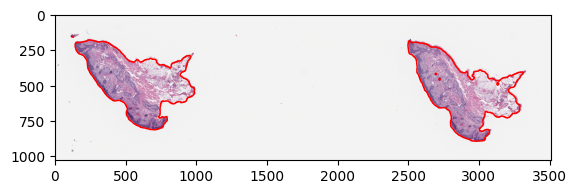

In [140]:
impath = "/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/photoaging/WSI_combined/535094_.svs"
slide = slideio.open_slide(impath,'SVS')
num_scenes = slide.num_scenes
scene = slide.get_scene(0)
full_img = scene.read_block()
np_im =  np.asarray(full_img) 
print(np_im.shape)
detector.find_tissue_contours(np_im)
detector.plot_annotations()

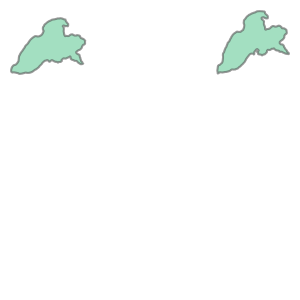

In [141]:
polygons = detector.get_contours()
polygons

(16782, 31872, 3)


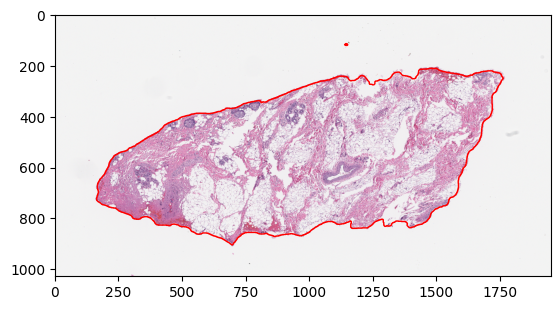

In [142]:
impath = "/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/photoaging/WSI_combined/534987_.svs"
slide = slideio.open_slide(impath,'SVS')
num_scenes = slide.num_scenes
scene = slide.get_scene(0)
full_img = scene.read_block()
np_im =  np.asarray(full_img) 
print(np_im.shape)
detector.find_tissue_contours(np_im)
detector.plot_annotations()

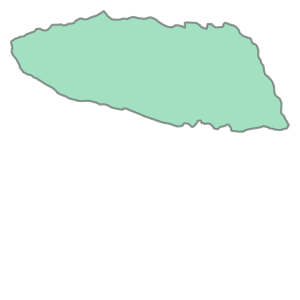

In [143]:
polygons = detector.get_contours()
polygons

(34692, 133464, 3)


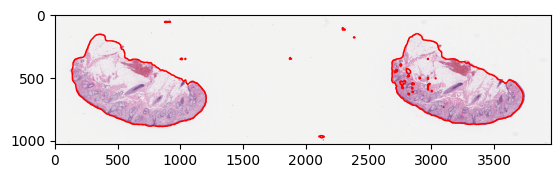

In [144]:
impath = "/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/photoaging/WSI_combined/510696_.svs"
slide = slideio.open_slide(impath,'SVS')
num_scenes = slide.num_scenes
scene = slide.get_scene(0)
full_img = scene.read_block()
np_im =  np.asarray(full_img) 
print(np_im.shape)
detector.find_tissue_contours(np_im)
detector.plot_annotations()

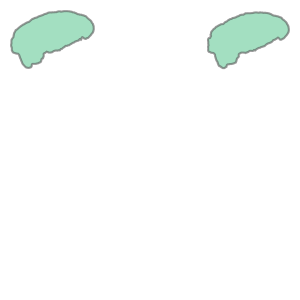

In [145]:
polygons = detector.get_contours()
polygons

In [149]:
impath = "/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Students/projects/photoaging/WSI_combined/535489_.svs"
slide = slideio.open_slide(impath,'SVS')
num_scenes = slide.num_scenes
scene = slide.get_scene(0)
full_img = scene.read_block()
np_im =  np.asarray(full_img) 
print(np_im.shape)

(69518, 83664, 3)


ValueError: A linearring requires at least 4 coordinates.

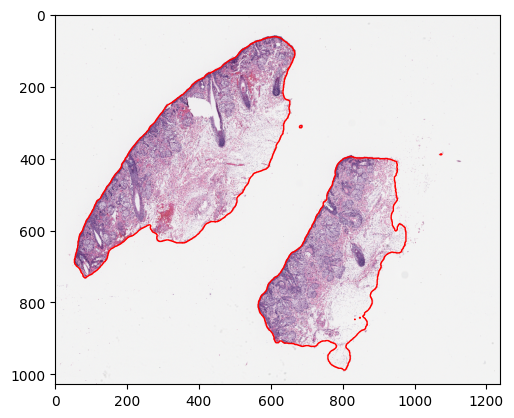

In [162]:
detector.find_tissue_contours(np_im, 0.045)
detector.plot_annotations()

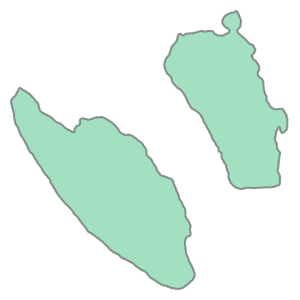

In [163]:
polygons = detector.get_contours()
polygons